<h1>Лабораторная работа №2.<span class="tocSkip"></span></h1>
<h2>Часть 1</h2>
<div class="toc"><ul class="toc-item"></ul></div>

## 1. Смоделировать выборку из n независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,σ²)

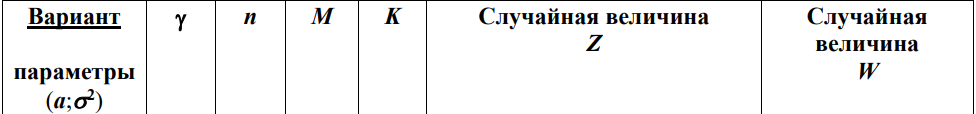

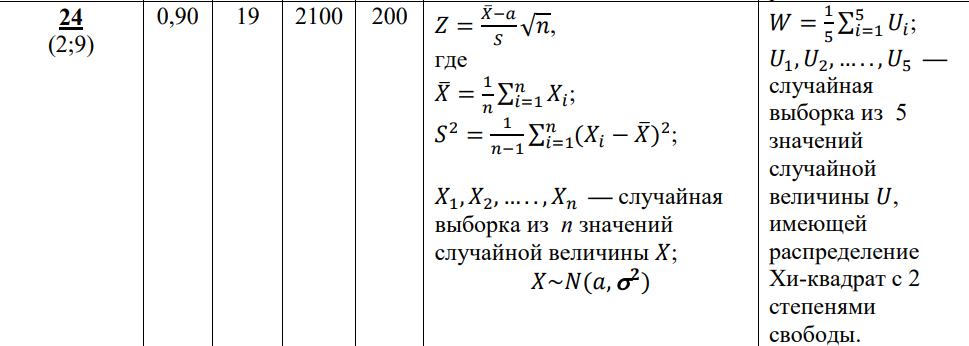

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as st
import scipy.stats as sts
import math

In [127]:
### задаем параметры нормального распредеелния
n=19
a=2
Sigma=np.sqrt(9)
#########################################
gamma=0.90 ### доверительная вероятность

In [128]:
#### генерируем выборку из нормально распределенной СВ X
X= np.random.normal(a, Sigma, n)
print(X)

[ 0.74059383 -2.73398735  5.43030543  2.27379614  2.63330542  0.0117784
  3.46371117  5.90801538  2.17567323  8.14292011  5.7359322   4.10512738
 -0.10464459  6.92138349  4.47011931 -2.85557973  1.8690482   1.42756231
 -0.20414556]


### 1.1. С надежностью ɣ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X известна (см. УКАЗАНИЕ).

#### УКАЗАНИЕ. В пунктах 1.1. и 1.2. Части I интервальные оценки найти двумя способами. Первый способ заключается в программной реализации формул для вычисления границ интервальной оценки, а второй — в использовании метода interval из модуля статистических функций scipy.stats

$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.95$$
$$
\Delta=\frac{t\sigma}{\sqrt{n}}$$
$$
t=\Phi^{-1}(\frac{\gamma}{2}) $$

In [129]:
# Вычисляем границы доверительного интервала вручную
P_=1/2+gamma/2
t = st.norm.ppf(P_, loc=0, scale=1) 
print(t)
delta = t * Sigma / np.sqrt(n)
x_mean = np.mean(X)

a_left = x_mean - delta
a_right = x_mean + delta
print(a_right-a_left)
print(f"Доверительный интервал для математического ожидания (известная дисперсия): [{a_left:.4f}, {a_right:.4f}]")

1.6448536269514722
2.264131811620363
Доверительный интервал для математического ожидания (известная дисперсия): [1.4685, 3.7326]


In [130]:
# Используем встроенные функции для расчета доверительного интервала
interval_estimate_1 = st.norm.interval(confidence = gamma, loc = x_mean, scale = Sigma/np.sqrt(n))

print(f"Доверительный интервал (известная дисперсия, метод interval): [{interval_estimate_1[0]:.4f}, {interval_estimate_1[1]:.4f}]")

Доверительный интервал (известная дисперсия, метод interval): [1.4685, 3.7326]


### 1.2. С надежностью ɣ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна.

$$P=(Xср- \Delta \le a \le Xср-\Delta)=0.95$$
$$
\Delta=\frac{t_\gamma*S}{\sqrt{n}}$$
$$
t_\gamma=t(\gamma; n) $$

In [131]:
# Вычисляем границы доверительного интервала вручную при неизвестной дисперсии
S = np.std(X, ddof=1)  # несмещенная оценка стандартного отклонения
t_gamma = st.t.ppf(P_, df = n - 1)  # критическое значение распределения Стьюдента.
print(t_gamma, S)
delta_= t_gamma * (S / np.sqrt(n))

a_left_ = x_mean - delta_
a_right_ = x_mean + delta_
print(a_right_-a_left_)
print(f"Доверительный интервал для математического ожидания (неизвестная дисперсия): [{a_left_:.4f}, {a_right_:.4f}]")

1.7340636066175354 3.077161297672773
2.448321691831649
Доверительный интервал для математического ожидания (неизвестная дисперсия): [1.3764, 3.8247]


In [132]:
# Используем встроенные функции для расчета доверительного интервала
interval_estimate_2 = st.t.interval(confidence = gamma, df = n-1, loc = x_mean, scale = S/np.sqrt(n))

print(f"Доверительный интервал (неизвестная дисперсия, метод interval): [{interval_estimate_2[0]:.4f}, {interval_estimate_2[1]:.4f}]")

Доверительный интервал (неизвестная дисперсия, метод interval): [1.3764, 3.8247]


### 1.3. С надежностью ɣ найти интервальную оценку (доверительный интервал) для дисперсии случайной величины X. 

$$
\left( \frac{(n - 1) S^2}{Y_{прав}}<\sigma^2<\frac{(n - 1) S^2}{Y_{лев}} \right)
$$
$$Y_{прав}=\chi^2_{\frac{1+\gamma}{2}, n-1}$$
$$Y_{лев}=\chi^2_{\frac{1-\gamma}{2}, n-1}$$

In [133]:
# Доверительный интервал для дисперсии
right = (1+gamma)/2
left = (1-gamma)/2

Y_right = st.chi2.ppf(right, df=n-1)
Y_left = st.chi2.ppf(left, df=n-1)

S_2 = S * S

right_bound = (n - 1) * S_2 / Y_right
left_bound = (n - 1) * S_2 / Y_left

print(f"Доверительный интервал для дисперсии:: [{right_bound:.4f}, {left_bound:.4f}]")

Доверительный интервал для дисперсии:: [5.9039, 18.1504]


## 2. Построить график зависимости длины доверительного интервала от надежности при неизменном объеме выборки для случаев интервального оценивания математического ожидания и дисперсии.


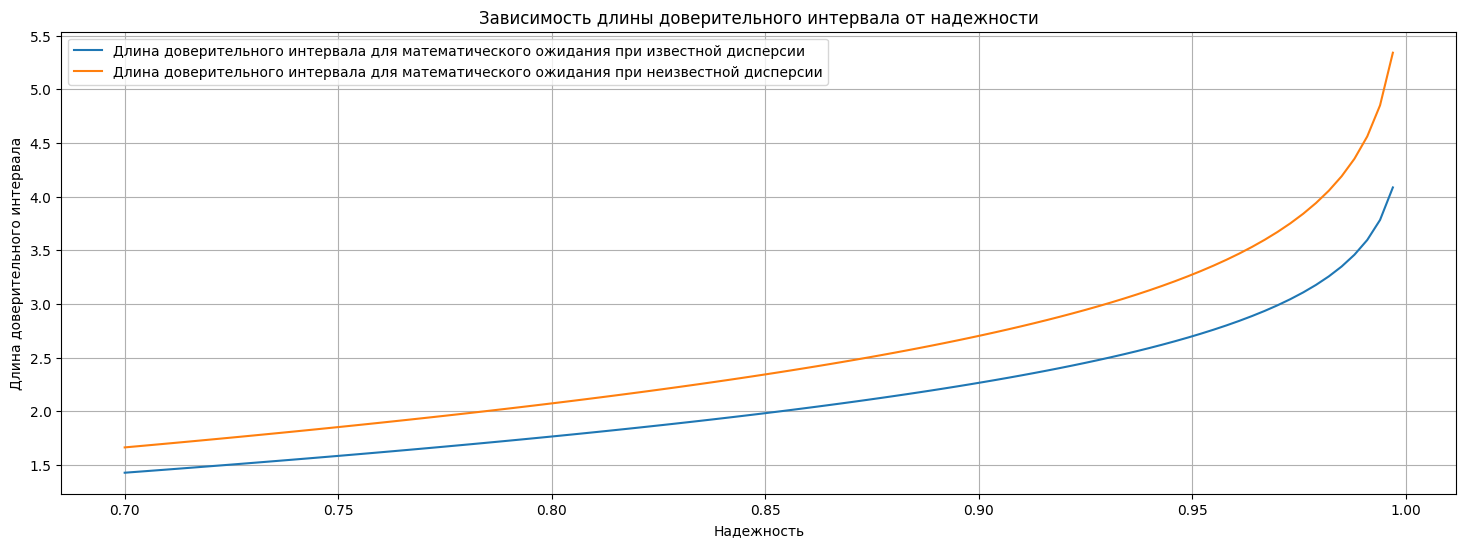

In [134]:
# Генерация выборки
sample = np.random.normal(a, Sigma, n)
sample_mean = np.mean(sample)

# Параметры для доверительных интервалов
V = 100  # количество уровней надежности
gamma_ = [0.0] * V  # массив надежности

gamma__0 = 0.7
gamma__1 = 0.9999999999
h = (gamma__1 - gamma__0) / V

# Длины доверительных интервалов
len_a_sigma_known = []  # при известной дисперсии
len_a_sigma_unknown = []  # при неизвестной дисперсии
len_sigma = []  # для дисперсии


for i in range(V):
    # 1. Доверительный интервал для математического ожидания при известной дисперсии
    gamma_[i] = gamma__0 + i * h
    interval_1 = st.norm.interval(confidence = gamma_[i], loc = sample_mean, scale = Sigma / np.sqrt(n))             
    len_a_sigma_known.append(interval_1[1] - interval_1[0])

    # 2. Доверительный интервал для математического ожидания при неизвестной дисперсии

    S__ = np.std(sample, ddof=1)  # несмещенная оценка стандартного отклонения
    interval_2 = st.t.interval(confidence = gamma_[i], df = n-1, loc = x_mean, scale = S__/np.sqrt(n))
    len_a_sigma_unknown.append(interval_2[1] - interval_2[0])

    # # 3. Доверительный интервал для дисперсии
    # right_ = (1+gamma_[i])/2
    # left_ = (1-gamma_[i])/2
    # Y_right_ = st.chi2.ppf(right_, df=n-1)
    # Y_left_ = st.chi2.ppf(left_, df=n-1)
    # S__2 = S__ * S__
    # right_bound_ = (n - 1) * S__2 / Y_right_
    # left_bound_ = (n - 1) * S__2 / Y_left_
    # len_sigma.append(left_bound_ - right_bound_)

# Построение графиков
plt.figure(figsize=(18, 6))
plt.plot(gamma_, len_a_sigma_known, label='Длина доверительного интервала для математического ожидания при известной дисперсии')
plt.plot(gamma_, len_a_sigma_unknown, label='Длина доверительного интервала для математического ожидания при неизвестной дисперсии')
# plt.plot(gamma_, len_sigma, label='Длина доверительного интервала для дисперсии')

plt.title('Зависимость длины доверительного интервала от надежности')
plt.xlabel('Надежность')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.xticks(np.linspace(0.7, 1, 7))
plt.show()

## 3. Построить график зависимости длины доверительного интервала от объема выборки при неизменной надежности для случаев интервального оценивания математического ожидания и дисперсии.

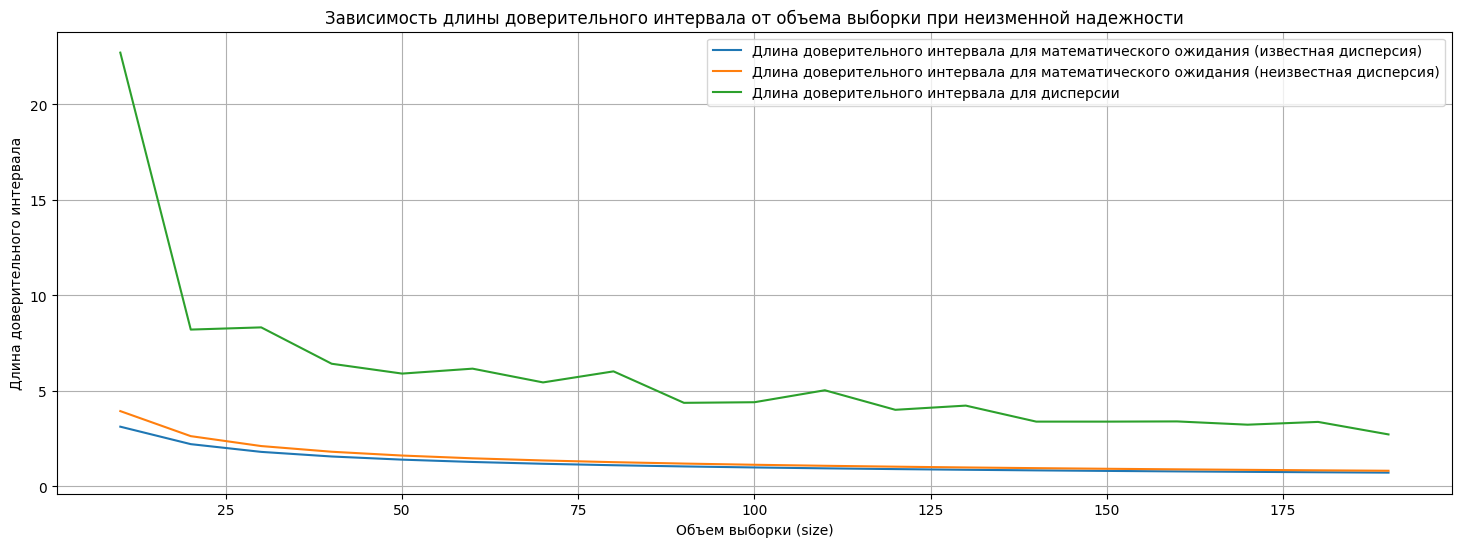

In [135]:
# Массив значений объема выборки
n_values = np.arange(10, 200, 10)

# Длины доверительных интервалов
len_a_sigma_known_ = []  # при известной дисперсии
len_a_sigma_unknown_ = []  # при неизвестной дисперсии
len_sigma_ = []  # для дисперсии

# Генерация выборки и вычисление длин доверительных интервалов для разных n
for size in n_values:
    sample_ = np.random.normal(a, Sigma, size)
    sample_mean_ = np.mean(sample_)
    
    # 1. Доверительный интервал для математического ожидания при известной дисперсии
    interval_1_ = st.norm.interval(confidence = gamma, loc = sample_mean_, scale = Sigma / np.sqrt(size))             
    len_a_sigma_known_.append(interval_1_[1] - interval_1_[0])

    # 2. Доверительный интервал для математического ожидания при неизвестной дисперсии
    S___ = np.std(sample_, ddof=1)  # несмещенная оценка стандартного отклонения
    interval_2_ = st.t.interval(confidence = gamma, df = size-1, loc = sample_mean_, scale = S__ / np.sqrt(size))
    len_a_sigma_unknown_.append(interval_2_[1] - interval_2_[0])

    # 3. Доверительный интервал для дисперсии
    right_ = (1 + gamma) / 2
    left_ = (1 - gamma) / 2
    Y_right_ = st.chi2.ppf(right_, df=size-1)
    Y_left_ = st.chi2.ppf(left_, df=size-1)
    S___2 = S___ * S___
    right_bound_ = (size - 1) * S___2 / Y_right_
    left_bound_ = (size - 1) * S___2 / Y_left_
    len_sigma_.append(left_bound_ - right_bound_)

# Построение графиков
plt.figure(figsize=(18, 6))
plt.plot(n_values, len_a_sigma_known_, label='Длина доверительного интервала для математического ожидания (известная дисперсия)')
plt.plot(n_values, len_a_sigma_unknown_, label='Длина доверительного интервала для математического ожидания (неизвестная дисперсия)')
plt.plot(n_values, len_sigma_, label='Длина доверительного интервала для дисперсии')

plt.title('Зависимость длины доверительного интервала от объема выборки при неизменной надежности')
plt.xlabel('Объем выборки (size)')
plt.ylabel('Длина доверительного интервала')
plt.grid()
plt.legend()
plt.show()

## 4. Смоделировать M=2100 выборок из 19 значений нормально распределенной случайной величины X с параметрами (2,3²). По каждой из M выборок с надежностью ɣ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна. По результатам моделирования найти точечную оценку ɣ* надежности ɣ.

In [136]:
M=2100
count_gamma = 0  # Счетчик попаданий истинного значения в интервал

for i in range(M):
    # Генерация выборки
    sample = np.random.normal(a, Sigma, n)
    sample_mean = np.mean(sample)  # Выборочное среднее
    S = np.std(sample, ddof=1)  # Несмещённая оценка стандартного отклонения
    
    # Построение доверительного интервала
    interval = st.t.interval(confidence=gamma, df=n-1, loc=sample_mean, scale = S / np.sqrt(n))
    ci_lower, ci_upper = interval
    
    # Проверка попадания истинного значения a в интервал
    if ci_lower <= a <= ci_upper:
        count_gamma += 1

# Точечная оценка надежности γ*
gamma_star = count_gamma / M
print(f"Точечная оценка надежности γ*: {gamma_star:.4f}")

Точечная оценка надежности γ*: 0.8919


Отклонение 𝛾∗ от 𝛾 — это естественный результат статистического моделирования. Основными причинами являются конечное число экспериментов (M), небольшой размер выборки (n). Увеличение M и n может существенно уменьшить это отклонение.

## 5. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,σ²). 

In [137]:
M = 2100
n = 19

# Массив для хранения выборок
samples = np.zeros((M, n))

# Генерация выборок
for i in range(M):
    samples[i] = np.random.normal(a, Sigma, n)

### 5.1. По каждой из M выборок найти наблюдаемое значение случайной величины Z


$Z = \frac{\bar{X} - a}{S} \cdot \sqrt{n}$

In [138]:
# Список для хранения наблюдаемых значений Z
z_arr = []

for sample in samples:
    # Выборочное среднее
    x_m = np.mean(sample)
    
    # Выборочное стандартное отклонение
    s = np.std(sample, ddof=1)
    
    # Наблюдаемое значение Z
    z = (x_m - a) * np.sqrt(n) / s
    z_arr.append(z)

### 5.2. По выборке из M значений случайной величины Z найти выборочные числовые характеристики ее распределения.

In [139]:
z_mean=np.mean(z_arr)               #Математическое ожидание
z_var=np.var(z_arr)                 #Медиана
z_median = np.median(z_arr)         #Дисперсия
std= np.std(z_arr)                  #Стандартное отклонение
skewness = sts.skew(z_arr)          # Коэффициент ассиметрии
kurtosis = sts.kurtosis(z_arr)      #Эксцесс

# Вывод результатов
print(f'Математическое ожидание: {z_mean:.5f}')
print(f'Медиана: {z_median:.5f}')
print(f'Дисперсия: {z_var:.3f}')
print(f'Стандартное отклонение: {std:.5f}')
print(f'Коэффициент ассиметрии: {skewness:.5f}')
print(f'Эксцесс: {kurtosis:.5f}')

Математическое ожидание: -0.01281
Медиана: -0.01247
Дисперсия: 1.116
Стандартное отклонение: 1.05641
Коэффициент ассиметрии: -0.01432
Эксцесс: 0.43077


### 5.3. Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины Z, а также ящичковую диаграмму.


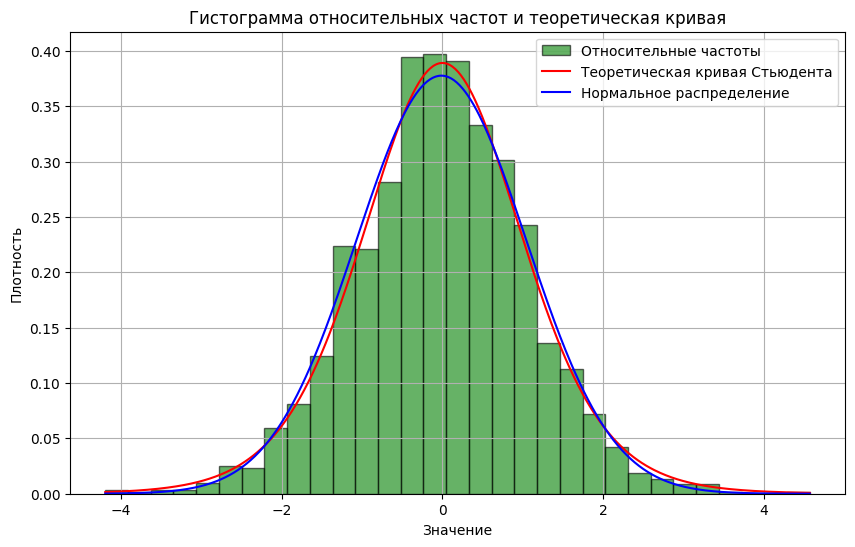

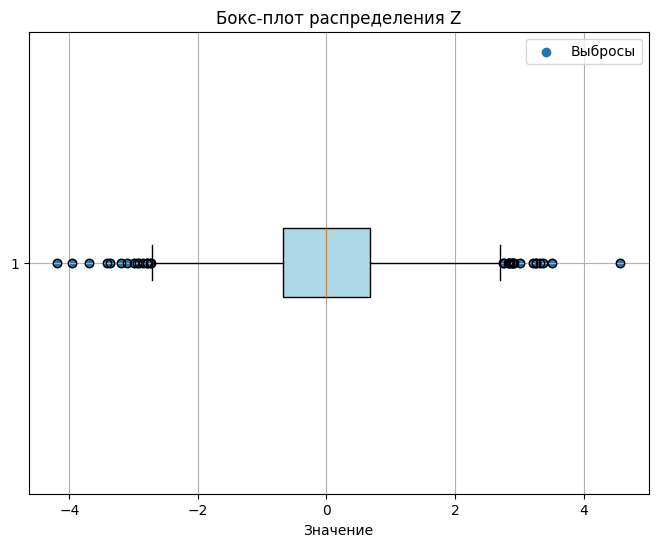

Фактическое количество выбросов: 32


In [140]:
# Гистограмма относительных частот
plt.figure(figsize=(10, 6))
plt.hist(z_arr, bins="scott", density=True, alpha=0.6, color='g', edgecolor='black', label='Относительные частоты')

# Теоретическая кривая распределения Стьюдента
x = np.linspace(np.min(z_arr), np.max(z_arr), 500)
pdf_t = sts.t.pdf(x, df=10)
plt.plot(x, pdf_t, 'r', label="Теоретическая кривая Стьюдента")

# Нормальное распределение
pdf_norm = sts.norm.pdf(x, loc=np.mean(z_arr), scale=np.std(z_arr))
plt.plot(x, pdf_norm, 'b', label="Нормальное распределение")

plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

# Ящичковая диаграмма
plt.figure(figsize=(8, 6))
plt.boxplot(z_arr, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Бокс-плот распределения Z')
plt.xlabel('Значение')
plt.grid(True)

# Интерквартильный размах
q1 = np.percentile(z_arr, 25)
q3 = np.percentile(z_arr, 75)
iqr = q3 - q1

# Границы усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Добавляем выбросы на боксплот
outliers = [z for z in z_arr if z < lower_bound or z > upper_bound]
plt.scatter(outliers, [1] * len(outliers), label='Выбросы')

plt.legend()
plt.show()

# Фактическое количество выбросов
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")

### 5.4. Каков закон распределения случайной величины Z? 

нормальное